# Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).



In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data
y=digits.target

Посмотрим на данные:

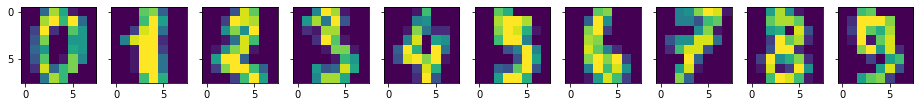

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

f, axes = plt.subplots(1, 10, sharey=True, figsize=(16,6))
for i in range(10):
    axes[i].imshow(X[i,:].reshape([8,8]));
plt.show()

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Предлагаю использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

In [0]:
digits.data.shape[1]

64

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)
cross_val_score(clf, X, y, cv=10).mean()

0.8336246139970982

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [0]:
from sklearn.ensemble import BaggingClassifier
b_clf = BaggingClassifier(n_estimators=100)

Определите качество классификации новой модели. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [0]:
cross_val_score(b_clf, X, y, cv=10).mean()

0.9220778377616241

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков. Определите качество работы получившегося классификатора. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [0]:
b2_clf = BaggingClassifier(n_estimators=100, max_features = round(data.data.shape[1]**0.5))
b2_clf

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=8, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [0]:
cross_val_score(b2_clf, X, y, cv=10).mean()

0.9332839719687781

Полученный классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 1000, max_features = round(data.data.shape[1]**0.5))
cross_val_score(rf_clf, X, y, cv=10).mean()

0.9522393214269643

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

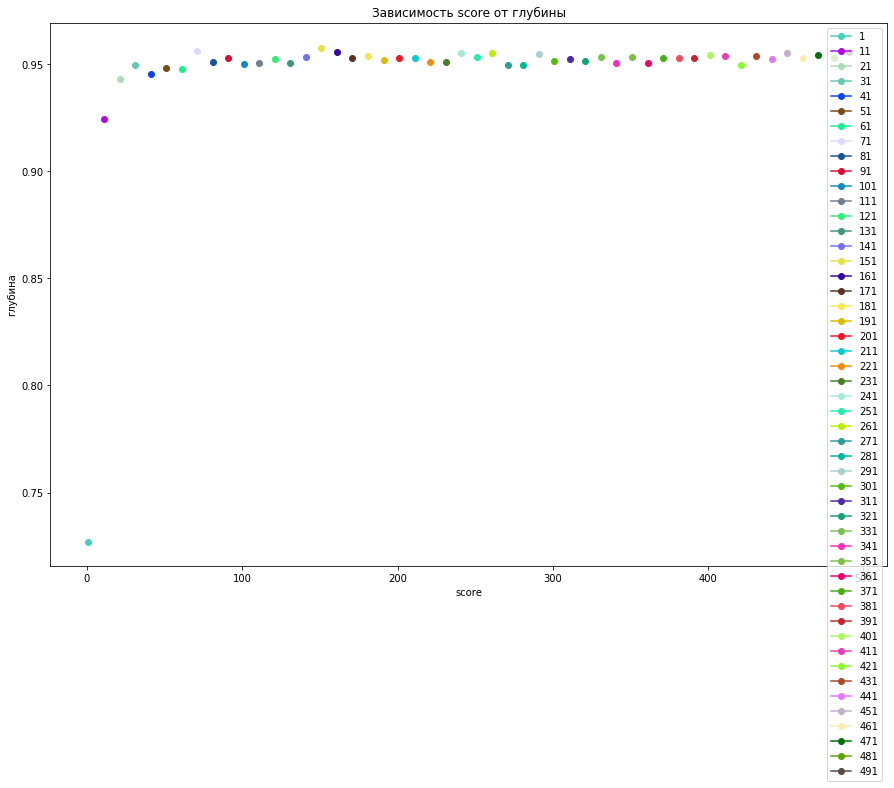

In [0]:
plt.rcParams['figure.figsize'] = (15, 10)  
# Plot the results
plt.figure()

for i in range(1, 500, 10):
    rf_clf = RandomForestClassifier(n_estimators = i, max_features = round(data.data.shape[1]**0.5))
    cross_val_score(rf_clf, X, y, cv=10).mean()
    plt.plot(i, cross_val_score(rf_clf, X, y, cv=10).mean(), 'o-', label=i, color=np.random.rand(3))


plt.xlabel("score")
plt.ylabel("глубина")
plt.title("Зависимость score от глубины")
plt.legend()
plt.show()

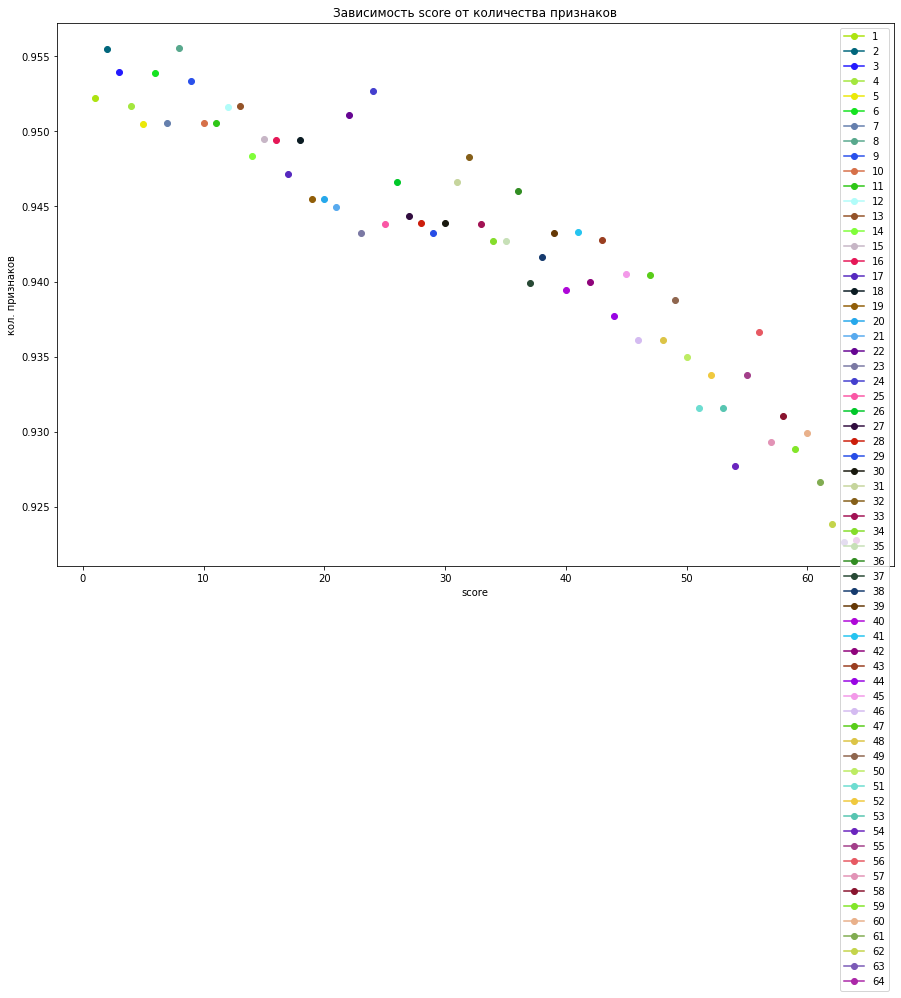

In [0]:
plt.rcParams['figure.figsize'] = (15, 10)  
# Plot the results
plt.figure()

for i in range(1, 65):
    rf_clf = RandomForestClassifier(n_estimators = 100, max_features = i)
    cross_val_score(rf_clf, X, y, cv=10).mean()
    plt.plot(i, cross_val_score(rf_clf, X, y, cv=10).mean(), 'o-', label=i, color=np.random.rand(3))


plt.xlabel("score")
plt.ylabel("кол. признаков")
plt.title("Зависимость score от количества признаков")
plt.legend()
plt.show()

На основе наблюдений отметьте номера правильных утверждений из приведенных ниже:

1) Случайный лес сильно переобучается с ростом количества деревьев.

+2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.

+3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

+5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

+7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
b2_clf = RandomForestClassifier(n_estimators=100)

cross_val_score(b2_clf, X, y, cv=10).mean()

0.9539195277913786